# 数据清洗

In [1]:
# 导入所需的工具包
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#设置默认字体大小
plt.rcParams['font.size'] = 25
# 导入设置图片大小的工具
from IPython.core.pylabtools import figsize

#导入用于可视化的Seaborn
import seaborn as sns
sns.set(font_scale = 2)

In [2]:
data=pd.read_csv(r"E:\数据分析方法\18124399冯秦萱\bilibili_data.csv",encoding='gbk')
data.head()

,title,episodes,mark,score,is_finish,link,series_follow,follows,coins,likes,danmus,views,season_id,media_id,tags,comments,pub_date,intro
0,岸边露伴 一动也不动,全4话,独家,9.9分,1,https://www.bilibili.com/bangumi/play/ss38035,5456960,5195234,80729,272069,68459,9623839,38035,28233715,"['漫画改', '奇幻', '战斗']",12237.0,2021/2/20,本作是在「JOJO的奇妙冒险 不灭钻石」中登场的漫画家?岸边露伴，为了收集漫画的素材而前往各...
1,悠哉日常大王 第三季,更新至第8话,独家,9.9分,0,https://www.bilibili.com/bangumi/play/ss36204,1451833,1411113,197644,310024,125331,10507316,36204,28231846,"['漫画改', '日常', '萌系', '治愈']",13027.0,2021/1/11,「旭丘分校」的学生，仅有五人。虽然学年性格各不相同，但大家一起做菜、一起捉虫、一起试着练习乐...
2,Love Live! 学园偶像 电影,全1话,独家,9.9分,1,https://www.bilibili.com/bangumi/play/ss35182?...,1736399,1635618,39757,74315,36463,1552355,35182,28230704,"['原创', '校园', '偶像']",7772.0,2015/6/13,【本字幕由LoveEcho!字幕组协力译制】学园偶像们以演出角逐的大赛“LoveLive!”...
3,来自深渊 剧场版总集篇,全2话,独家,9.9分,1,https://www.bilibili.com/bangumi/play/ss34544,769704,318750,27130,55051,42657,2917411,34544,28230043,"['漫画改', '奇幻', '冒险', '架空']",7037.0,2019/1/4,在每一个角落都被探索完毕的世界中，唯一残留的秘境——大洞穴“深渊”。不知道延续到何方，深不见...
4,黄金神威 第三季,全12话,会员专享,9.9分,1,https://www.bilibili.com/bangumi/play/ss34419,603655,396107,61387,123413,68492,6466962,34419,28229888,"['漫画改', '冒险', '历史', '搞笑']",11369.0,2020/10/5,杉元能否与阿席莉帕重逢！？于极寒之地开启新局面的生存竞争，桦太篇开幕！！！网走监狱展开的激烈...


## 空值处理

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
title            2000 non-null object
episodes         1999 non-null object
mark             677 non-null object
score            2000 non-null object
is_finish        2000 non-null int64
link             2000 non-null object
series_follow    2000 non-null int64
follows          2000 non-null int64
coins            2000 non-null int64
likes            2000 non-null int64
danmus           2000 non-null int64
views            2000 non-null int64
season_id        2000 non-null int64
media_id         2000 non-null int64
tags             1998 non-null object
comments         1998 non-null float64
pub_date         1998 non-null object
intro            1998 non-null object
dtypes: float64(1), int64(9), object(8)
memory usage: 281.3+ KB


In [4]:
data=data[data['tags'].notnull()]

In [5]:
data=data[data['tags']!='[]']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 1999
Data columns (total 18 columns):
title            1943 non-null object
episodes         1942 non-null object
mark             662 non-null object
score            1943 non-null object
is_finish        1943 non-null int64
link             1943 non-null object
series_follow    1943 non-null int64
follows          1943 non-null int64
coins            1943 non-null int64
likes            1943 non-null int64
danmus           1943 non-null int64
views            1943 non-null int64
season_id        1943 non-null int64
media_id         1943 non-null int64
tags             1943 non-null object
comments         1943 non-null float64
pub_date         1943 non-null object
intro            1943 non-null object
dtypes: float64(1), int64(9), object(8)
memory usage: 288.4+ KB


In [7]:
data[data['episodes'].isnull()]

,title,episodes,mark,score,is_finish,link,series_follow,follows,coins,likes,danmus,views,season_id,media_id,tags,comments,pub_date,intro
1656,伪恋 OAD,NaN,NaN,9.2分,1,https://www.bilibili.com/bangumi/play/ss1575,2044960,440936,24059,7269,158169,6828283,1575,1575,['校园'],1431.0,2014/10/3,随《伪恋》单行本发售的OVA·OAD，共4话。第一话为漫画单行本第14卷的同捆OVA，内容改...


In [8]:
data['episodes'].replace(np.nan,'全1话',inplace=True)

In [9]:
data['mark'].replace(np.nan,'免费',inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 1999
Data columns (total 18 columns):
title            1943 non-null object
episodes         1943 non-null object
mark             1943 non-null object
score            1943 non-null object
is_finish        1943 non-null int64
link             1943 non-null object
series_follow    1943 non-null int64
follows          1943 non-null int64
coins            1943 non-null int64
likes            1943 non-null int64
danmus           1943 non-null int64
views            1943 non-null int64
season_id        1943 non-null int64
media_id         1943 non-null int64
tags             1943 non-null object
comments         1943 non-null float64
pub_date         1943 non-null object
intro            1943 non-null object
dtypes: float64(1), int64(9), object(8)
memory usage: 288.4+ KB


In [11]:
data.reset_index(drop=True, inplace=True)

## 数值化处理

In [12]:
#只取episodes列的数字
data['episodes'] = data['episodes'].str.extract('(\d+)', expand=False)
data['episodes']=data['episodes'].astype("int64")

In [13]:
data['score']=data.score.str.strip("分")
data['score']=data['score'].astype("float64")

In [14]:
import re
regStr = ".*?([\u4E00-\u9FA5]+).*?"  #取中文字符的正则化表达
temp_list = [re.findall(regStr, i) for i in data["tags"]]
# 获取分类(去重)
tag_list = np.unique([i for j in temp_list for i in j]) 
# 增加空白列，用来计数(实际上也是one-hot编码)
tag_df = pd.DataFrame(np.zeros([data.shape[0],tag_list.shape[0]]),columns=tag_list)
for i in range(1943):
    #temp_list[i] ['漫画改', '搞笑', '冒险', '历史']  
    #用ix实现复杂切片，类似定位
    tag_df.ix[i,temp_list[i]]=1 
    
#print(tag_df.sum().sort_values())
tag_df.head()


E:\Anaconda 3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


,乙女,偶像,催泪,冒险,剧情,动作,动画,励志,历史,原创,...,神魔,科幻,穿越,美食,职场,萌系,萝莉,运动,音乐,魔法
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#查看所有类别
tag_df.columns

Index(['乙女', '偶像', '催泪', '冒险', '剧情', '动作', '动画', '励志', '历史', '原创', '声控', '奇幻',
       '小说改', '少儿', '少女', '恋爱', '战斗', '推理', '搞笑', '日常', '时泪', '智斗', '机战', '架空',
       '校园', '治愈', '泡面', '游戏改', '漫画改', '热血', '爱情', '社团', '神魔', '科幻', '穿越',
       '美食', '职场', '萌系', '萝莉', '运动', '音乐', '魔法'],
      dtype='object')

In [16]:
dat=pd.concat([data,tag_df],axis=1)
dat.drop('tags',axis=1,inplace=True)
dat.head()

,title,episodes,mark,score,is_finish,link,series_follow,follows,coins,likes,...,神魔,科幻,穿越,美食,职场,萌系,萝莉,运动,音乐,魔法
0,岸边露伴 一动也不动,4,独家,9.9,1,https://www.bilibili.com/bangumi/play/ss38035,5456960,5195234,80729,272069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,悠哉日常大王 第三季,8,独家,9.9,0,https://www.bilibili.com/bangumi/play/ss36204,1451833,1411113,197644,310024,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Love Live! 学园偶像 电影,1,独家,9.9,1,https://www.bilibili.com/bangumi/play/ss35182?...,1736399,1635618,39757,74315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,来自深渊 剧场版总集篇,2,独家,9.9,1,https://www.bilibili.com/bangumi/play/ss34544,769704,318750,27130,55051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,黄金神威 第三季,12,会员专享,9.9,1,https://www.bilibili.com/bangumi/play/ss34419,603655,396107,61387,123413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data['mark'].value_counts()

免费      1281
独家       343
会员专享     270
出品        23
限时免费      18
会员抢先       8
Name: mark, dtype: int64

In [18]:
data['mark'].replace({"免费":0,"独家":1,"会员专享":1,"出品":1,"限时免费":1,"会员抢先":0},inplace=True)

## 异常值处理 

In [19]:
data=data[data['pub_date']!='敬请期待']

In [20]:
data['pub_date'].describe()

count         1942
unique        1247
top       2015/4/4
freq             8
Name: pub_date, dtype: object

In [21]:
data['episodes'].value_counts().index.sort_values()

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             480,  873, 1055, 1056, 2016, 2017, 2018, 2019, 2020, 6674],
           dtype='int64', length=106)

In [22]:
data['episodes'].replace([2016,2017,2018,2019,2020],1,inplace=True)

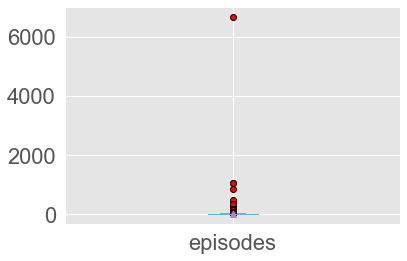

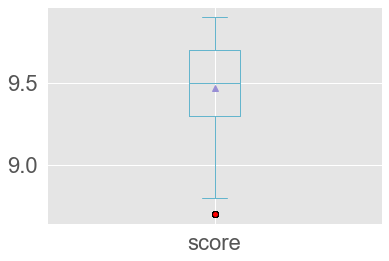

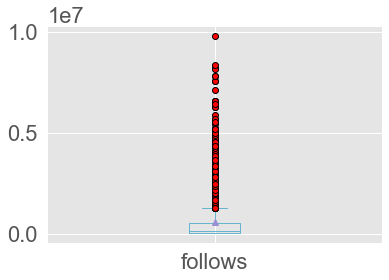

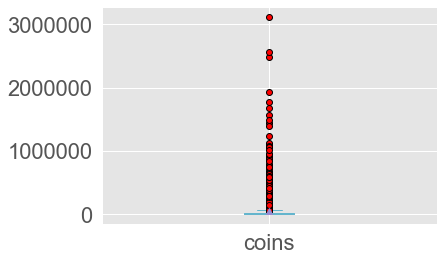

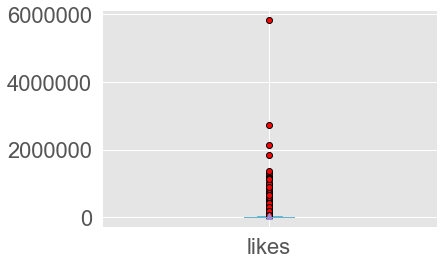

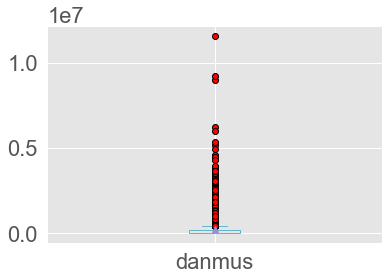

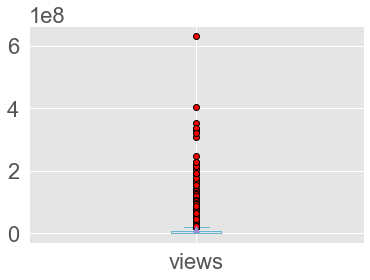

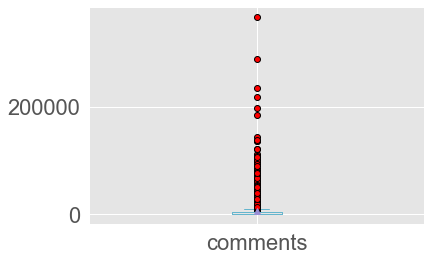

In [23]:
out_list=['episodes','score','follows','coins','likes','danmus','views','comments']
for i in range(8):
    plt.style.use('ggplot') 
    data[out_list[i]].plot(kind='box',color='c',showmeans=True,flierprops={'markerfacecolor':'red'})
    plt.show()

In [756]:
out_list=['episodes','score','follows','coins','likes','danmus','views','comments']
for item in out_list:
    First_Quartile=data[item].describe()['25%']
    Third_Quartile=data[item].describe()['75%']
    IR=Third_Quartile-First_Quartile
# 去除异常值
    data = data[(data[item] > (First_Quartile - 3 * IR)) &
                (data[item] < (Third_Quartile+ 3 * IR))]

In [757]:
data.to_csv(r"E:\数据分析方法\18124399冯秦萱\bilibili_processed.csv",encoding='utf_8_sig',index=0)

In [758]:
tag_df.to_csv(r"E:\数据分析方法\18124399冯秦萱\bilibili_tag.csv",encoding='utf_8_sig',index=0)

# 探索性分析

In [20]:
data=pd.read_csv(r"E:\数据分析方法\18124399冯秦萱\bilibili_processed.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 18 columns):
title            1311 non-null object
episodes         1311 non-null int64
mark             1311 non-null int64
score            1311 non-null float64
is_finish        1311 non-null int64
link             1311 non-null object
series_follow    1311 non-null int64
follows          1311 non-null int64
coins            1311 non-null int64
likes            1311 non-null int64
danmus           1311 non-null int64
views            1311 non-null int64
season_id        1311 non-null int64
media_id         1311 non-null int64
tags             1311 non-null object
comments         1311 non-null float64
pub_date         1311 non-null object
intro            1311 non-null object
dtypes: float64(2), int64(11), object(5)
memory usage: 184.4+ KB


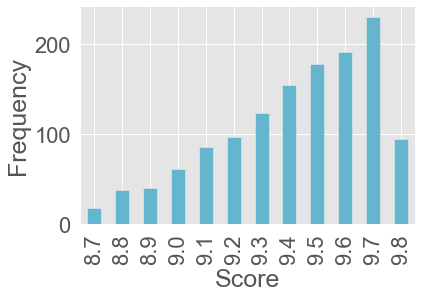

In [25]:
plt.style.use('ggplot') 
figsize=(6,4)
b=data['score'].value_counts().sort_index()
b.plot(kind="bar",color='c')
plt.ylabel('Frequency',size=25)
plt.xlabel('Score',size=25)
plt.savefig("1.png",dpi=300)
plt.show()

Text(0, 0.5, 'Frequency')

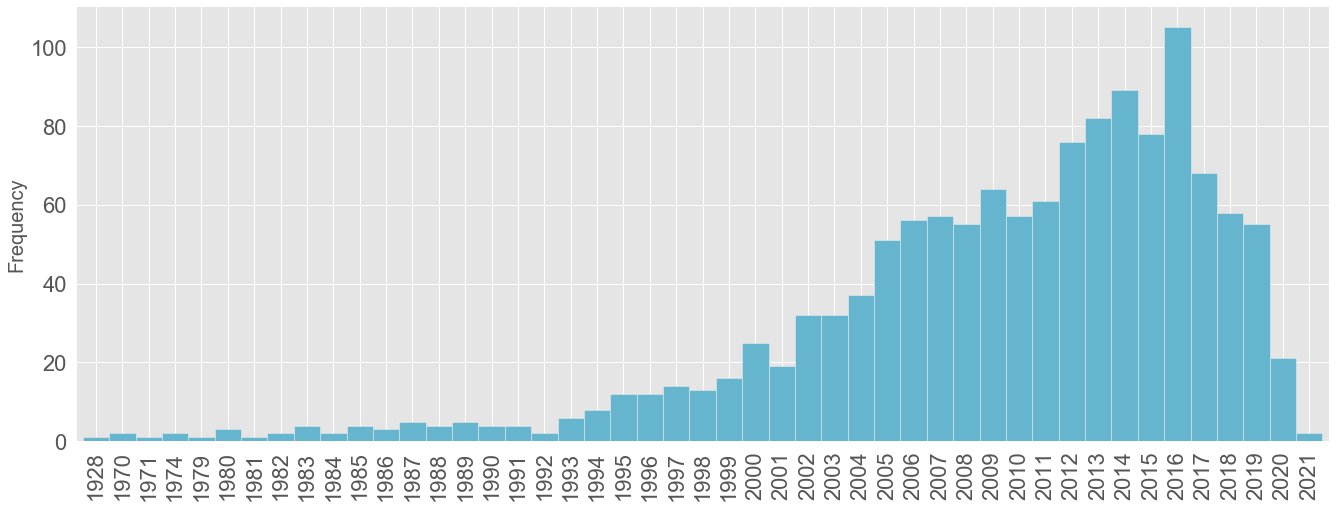

In [761]:
plt.style.use('ggplot') 
b=data['pub_date'].str[:4].value_counts().sort_index()
plt.figure(figsize=(20,8))
b.plot(kind="bar",width=1,color='c')
plt.ylabel('Frequency',size=20)


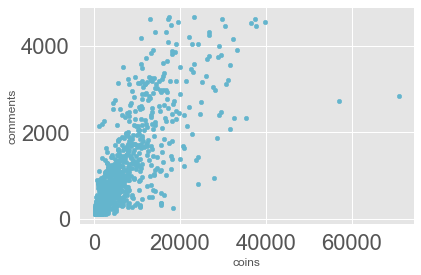

In [3]:
plt.style.use('ggplot') 
figsize=(12,8)
data.plot('coins','comments',kind='scatter',color='c')
plt.show()

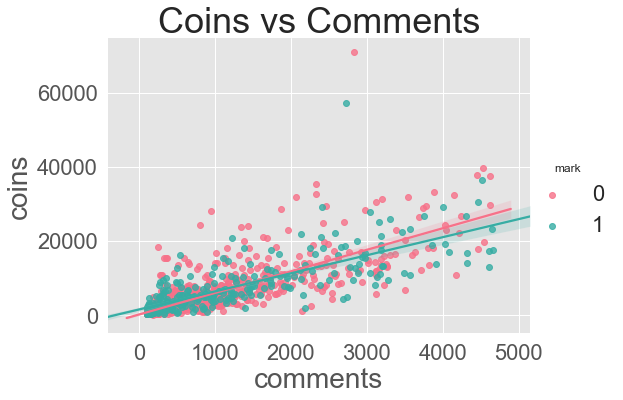

In [763]:
sns.lmplot(x="comments", y="coins", hue="mark", data=data,aspect=1.5,palette="husl")
plt.xlabel("comments", size = 28)
plt.ylabel('coins', size = 28)
plt.title('Coins vs Comments', size = 36)
plt.show()

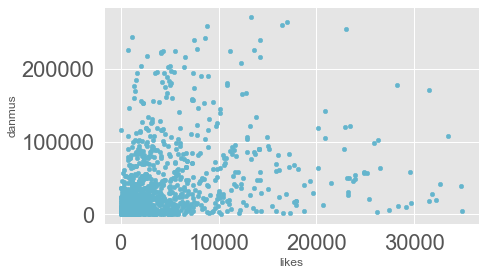

In [764]:
figsize=(8,8)
data.plot('likes','danmus',kind='scatter',color='c')

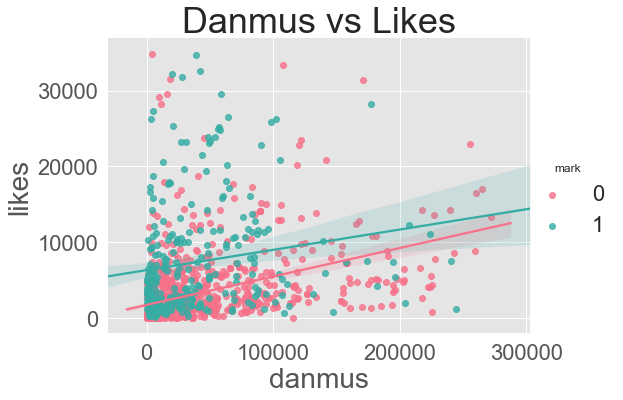

In [765]:
sns.lmplot(x="danmus", y="likes", hue="mark", data=data,aspect=1.5,palette="husl")
plt.xlabel("danmus", size = 28)
plt.ylabel('likes', size = 28)
plt.title('Danmus vs Likes', size = 36);

In [21]:
import re
regStr = ".*?([\u4E00-\u9FA5]+).*?"  #取中文字符的正则化表达
temp_list = [re.findall(regStr, i) for i in data["tags"]]
# 获取分类(去重)
tag_list = np.unique([i for j in temp_list for i in j]) 

# 增加空白列，用来计数(实际上也是one-hot编码)
tag_df = pd.DataFrame(np.zeros([data.shape[0],tag_list.shape[0]]),columns=tag_list)
for i in range(1311):
    #temp_list[i] ['漫画改', '搞笑', '冒险', '历史']
    tag_df.ix[i,temp_list[i]]=1   #用ix实现复杂切片，类似定位


E:\Anaconda 3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


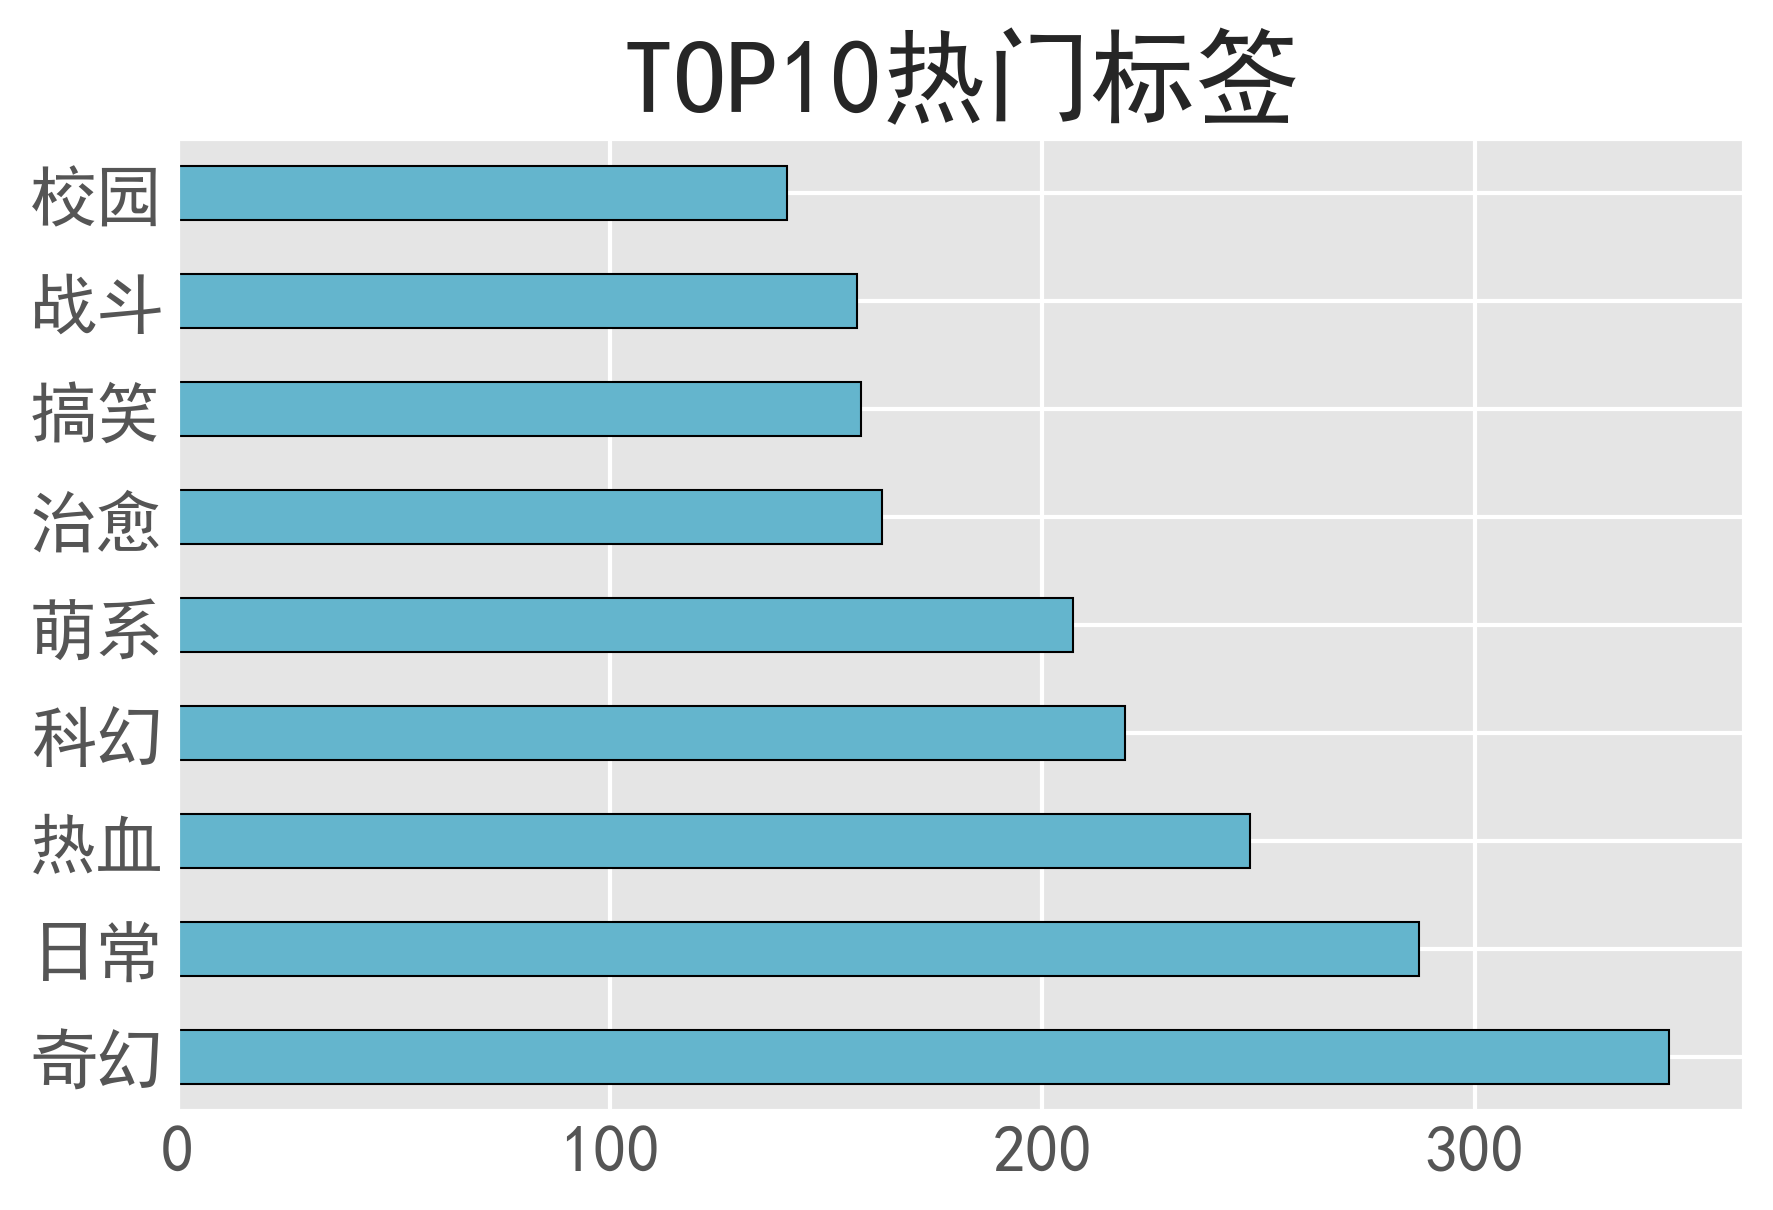

In [25]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.style.use('ggplot') 
figsize=(12,8)
plt.figure(dpi=300)
tag_df.sum().sort_values(ascending = False)[:9].plot(x = 'index',
                                            y = 'count',
                                            kind = 'barh',
                                            color = 'c', 
                                            edgecolor = 'black')
# 绘图格式
plt.ylabel('');
plt.yticks(size = 16);

plt.xticks(size = 16)

plt.title('TOP10热门标签', size = 25);


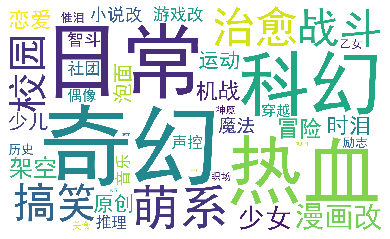

In [23]:
from wordcloud import WordCloud
figsize=(12,8)
tag_sum=tag_df.sum().sort_values()
wc = WordCloud(
        font_path=r"C:\users\deepblue\Downloads\simhei.ttf",
        max_words=100,
        width=2000,
        height=1200,
        background_color='white'
        )
word_cloud = wc.generate_from_frequencies(tag_sum)
# 写词云图片
word_cloud.to_file("wordcloud.jpg")
# 显示词云文件
plt.imshow(word_cloud)
plt.axis("off")
plt.show()


# 特征选择

In [24]:
features=data.select_dtypes('number')
features.drop(['season_id','media_id'],axis=1,inplace=True)

## 特征与likes列相关程度 

In [558]:
corr_list=abs(features.corr()['likes']).sort_values(ascending=False)
corr_list

likes            1.000000
coins            0.629859
comments         0.593331
views            0.516876
follows          0.514252
mark             0.329022
danmus           0.321019
series_follow    0.254510
episodes         0.042696
score            0.035430
is_finish        0.016094
Name: likes, dtype: float64

## 特征重要性（随机森林） 

In [218]:
from sklearn.ensemble import RandomForestRegressor

X = features.drop('likes', axis=1)
Y = features['likes']

clf = RandomForestRegressor()
clf.fit(X,Y)

importance = clf.feature_importances_
feature_results = pd.DataFrame({'feature': list(X.columns), 
                                'importance': clf.feature_importances_})
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
feature_results

E:\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,feature,importance
0,coins,0.522143
1,danmus,0.110297
2,follows,0.072731
3,series_follow,0.071794
4,comments,0.055397
5,views,0.048897
6,score,0.047133
7,episodes,0.042322
8,mark,0.029266
9,is_finish,0.000019


In [393]:
feature=['coins','views','follows','danmus','series_follow','comments','score','mark','likes']   
features=features[feature]

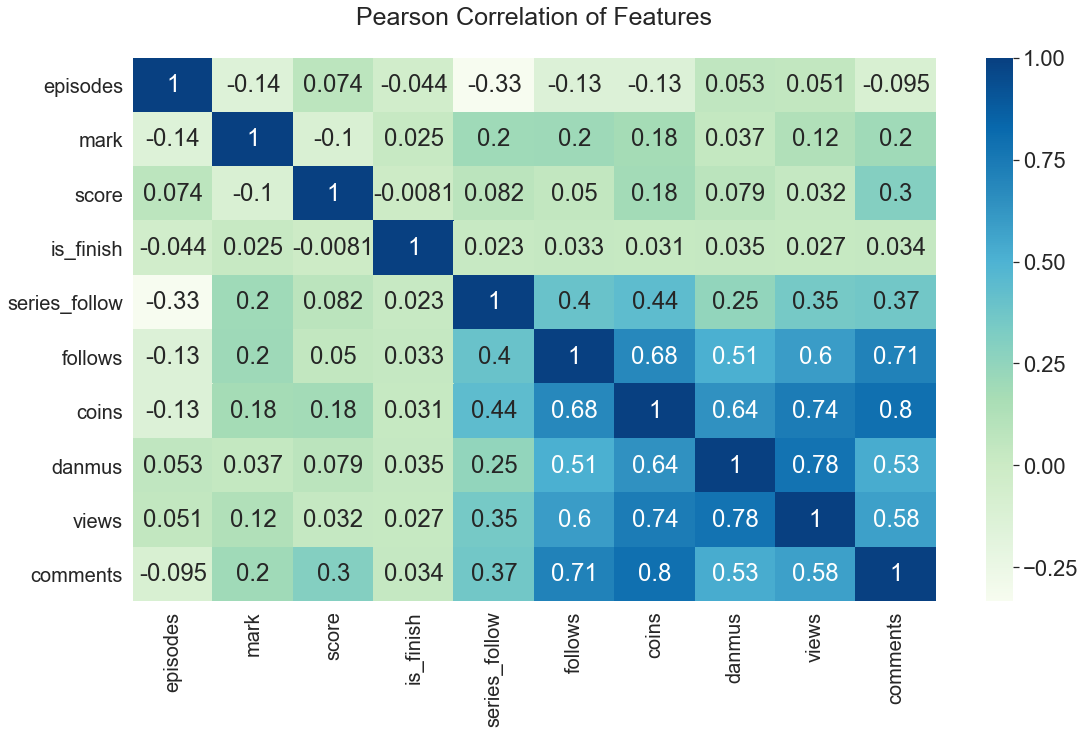

In [25]:
plt.rc('figure',figsize=(18,10))
plt.title('Pearson Correlation of Features',y=1.05,size=25)
corr_list=features.drop('likes',axis=1)
sns.heatmap(corr_list.corr('pearson'), annot=True,cmap='GnBu',vmax=1.0)
plt.xticks(rotation=90) 
plt.xticks(fontsize=20)
plt.yticks(rotation=360)
plt.yticks(fontsize=20)
plt.show()

## 去除高共线特征

In [394]:
#coins&comments,
#danmus&views
#coins&views
#comments&follows
features.drop('comments',axis=1,inplace=True)
features.drop('views',axis=1,inplace=True)

In [395]:
feature=['coins','follows','danmus','series_follow','score','mark','likes']   

In [26]:
a=pd.read_csv(r"E:\数据分析方法\18124399冯秦萱\bilibili_process.csv")
features=a.drop(['title','episodes','is_finish','link','comments','views','season_id','media_id','intro','pub_date'],axis=1)
features.to_csv(r"E:\数据分析方法\18124399冯秦萱\bilibili_feature.csv",encoding='utf_8_sig',index=0)
features.head()

,mark,score,series_follow,follows,coins,likes,danmus,乙女,偶像,催泪,...,神魔,科幻,穿越,美食,职场,萌系,萝莉,运动,音乐,魔法
0,1,9.8,42054,42054,3699,14313,4359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,9.8,1329569,32219,24186,6789,42722,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,9.8,648310,439718,29411,33390,107632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,9.8,574715,101403,10643,6649,65613,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,9.8,646174,460507,13587,10091,23523,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 模型构建

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [28]:
feature = features.drop(columns = 'likes')
targets = pd.DataFrame(features['likes'])

# 按照 7：3 的比例划分训练集和测试集(用train_test_split方法)
X, X_test, y, y_test = train_test_split(feature, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(917, 48)
(394, 48)
(917, 1)
(394, 1)


In [29]:
#将所有特征缩放到0-1之间（用MinMaxScaler方法）
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [30]:
# 将训练集和测试集的标签转换为一维数组
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [31]:
def mae (y_true,y_pred):
    return np.mean(abs(y_true - y_pred))

# 接受模型，训练模型，并在测试集上评估模型
def fit_and_evaluate(model):
    
    # 训练模型
    model.fit(X,y)
    
    # 做出预测和评估
    model_pred = model.predict(X_test)
    model_mae = mae(y_test,model_pred)
    
    # 返回性能指标
    return model_mae

In [32]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f'% lr_mae)

Linear Regression Performance on the test set: MAE = 2190.3482


In [33]:
svm = SVR(C=1000,gamma =0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 2244.0526


In [34]:
random_forest = RandomForestRegressor(random_state = 60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 2009.7203


E:\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 1920.2002


In [36]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 2654.4893


In [38]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada_mae = fit_and_evaluate(ada)
print('AdaBoost Performance on the test set: MAE = %0.4f' % ada_mae)

AdaBoost Performance on the test set: MAE = 3080.3824


<Figure size 1800x1200 with 0 Axes>

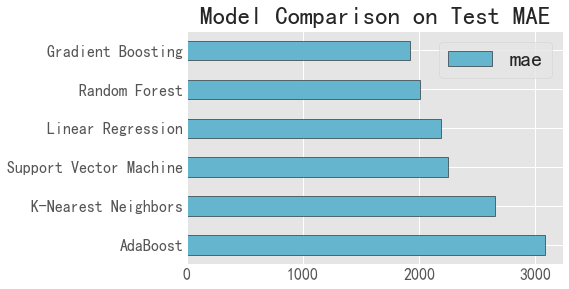

In [41]:
plt.figure(dpi=300)
plt.style.use('ggplot')
figsize=(15, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model':['Linear Regression',
                                          'Support Vector Machine',
                                          'Random Forest',
                                          'Gradient Boosting',
                                          'K-Nearest Neighbors',
                                          'AdaBoost'
                                          ],
                                'mae':[lr_mae,
                                       svm_mae,
                                       random_forest_mae, 
                                       gradient_boosted_mae, 
                                       knn_mae,
                                       ada_mae
                                       ]})
# 测试集上 mae的水平条形图
model_comparison.sort_values('mae',ascending = False).plot(x = 'model',
                                                           y = 'mae',
                                                           kind = 'barh',
                                                           color = 'c', 
                                                           edgecolor = 'black')
# 绘图格式
plt.ylabel('');
plt.yticks(size = 16);

plt.xticks(size = 16)

plt.title('Model Comparison on Test MAE', size = 25);

# 模型优化

In [10]:
#网格搜索

# 梯度增强过程中使用的树的数量
param={'n_estimators':[i for i in range(10,150)]}

# 对GradientBoostingRegressor模型进行参数网格搜索（基于随机搜索中得到的max_depth和loss）
model = GradientBoostingRegressor(loss='lad',
                                  min_samples_leaf=5,
                                  random_state = 42)

grid_search = GridSearchCV(estimator = model, param_grid=param, cv = 5, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, 
                           return_train_score = True)

grid_search.fit(X, y)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   47.7s finished
E:\Anaconda 3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='lad', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=5,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [11]:
grid_search.best_params_

{'n_estimators': 147}

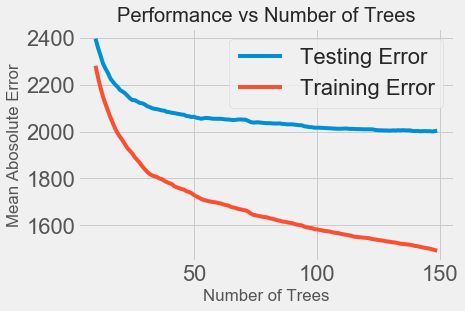

In [12]:
# 将结果导入数据框，绘制结果中param_n_estimators与mean_train_score、mean_test_score的曲线图
plt.style.use('ggplot')
figsize=(15, 8)
results = pd.DataFrame(grid_search.cv_results_)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

# 模型评估

In [14]:
# 构建基本GradientBoostingRegressor模型
base_model = GradientBoostingRegressor(random_state = 42)

# 获取最优模型
best_model = grid_search.best_estimator_

#显示最优模型参数
best_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=147,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [639]:
base_model.fit(X, y)
best_model.fit(X, y)
base_pred = base_model.predict(X_test)
best_pred = best_model.predict(X_test)

#基于y_test，用上文中的MAE指标计算模型拟合误差
print('base model performance on the test set: MAE = %0.4f.' % mae(y_test, base_pred))
print('best model performance on the test set: MAE = %0.4f.' % mae(y_test, best_pred))

base model performance on the test set: MAE = 1919.7229.
best model performance on the test set: MAE = 1826.7525.


<module 'matplotlib.pyplot' from 'E:\\Anaconda 3\\lib\\site-packages\\matplotlib\\pyplot.py'>

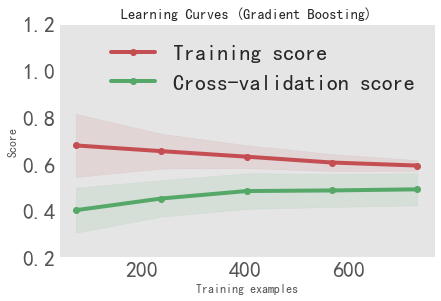

In [695]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
plt.style.use('ggplot') 
figsize=(15, 6) 
 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.style.use('ggplot') 
    figsize=(15, 6) 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt
 

 
# 图一
title = r"Learning Curves (Gradient Boosting)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = best_model
plot_learning_curve(estimator,title, X, y, ylim=(0.2, 1.2), cv=cv, n_jobs=1)

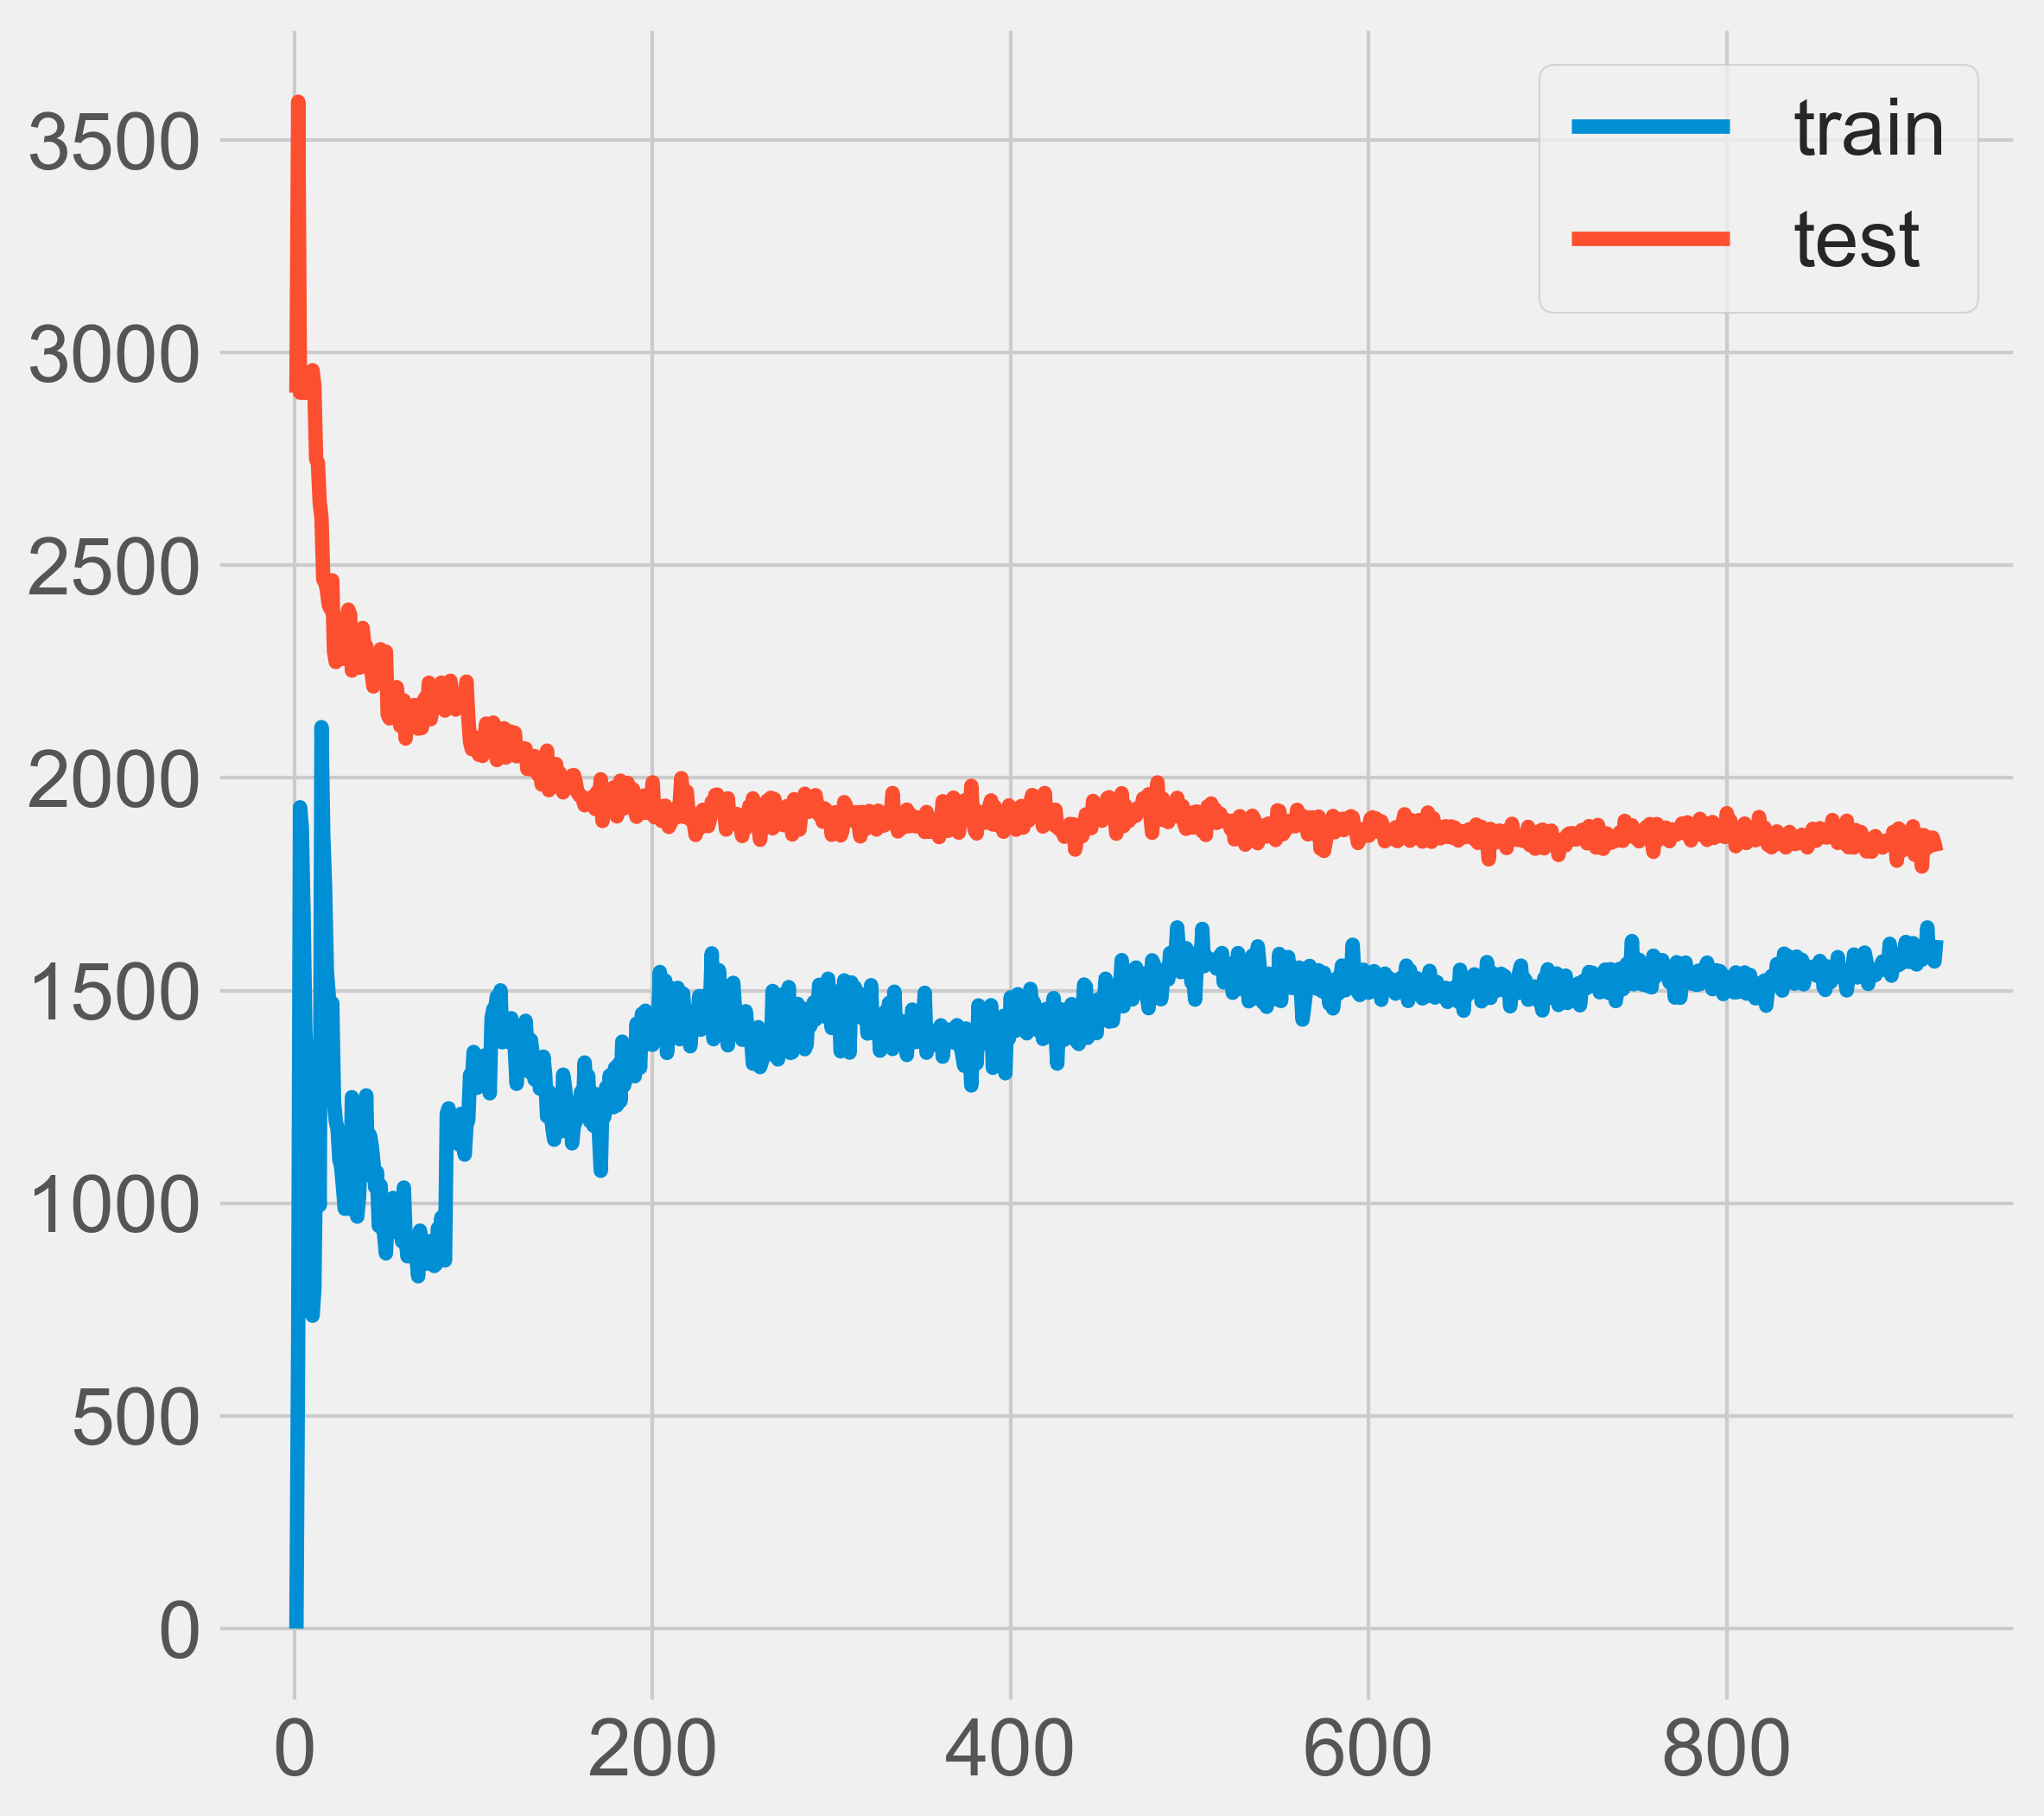

In [17]:
import sklearn.metrics
def plot_learning_curve(model,X,X_test,y,y_test):
    train_score=[]
    test_score=[]
    for i in range(1,len(X)+1):
        model.fit(X[:i],y[:i])
        y_train_predict=model.predict(X[:i])
        train_score.append(mae(y[:i],y_train_predict))
        y_test_predict=model.predict(X_test)
        test_score.append(mae(y_test,y_test_predict))
    plt.figure(figsize=(8,8),dpi=300)
    plt.plot([i for i in range(1,len(X)+1)],train_score,label="train")
    plt.plot([i for i in range(1,len(X)+1)],test_score,label="test")
    plt.legend()
    plt.show()
    
plot_learning_curve(best_model,X,X_test,y,y_test)

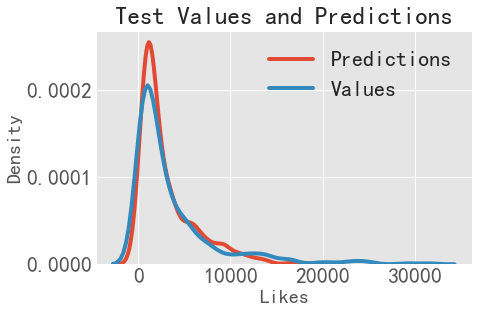

In [687]:
figsize = (6, 6)
plt.style.use('ggplot') 
# 最终预测的密度图和测试值
sns.kdeplot(best_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

plt.xlabel('Likes',size=20)
plt.ylabel('Density',size=20)
plt.title('Test Values and Predictions',size=25);

Text(0.5, 1.0, 'Distribution of Residuals')

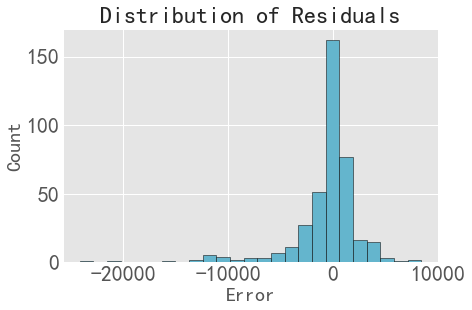

In [693]:
figsize = (6, 6)
# 计算最优模型的拟合残差
error = best_pred - y_test

# 绘制残差分布直方图，参数bin=20
plt.hist(error, color = 'c', bins = 25,
         edgecolor = 'black')
plt.xlabel('Error',size=20)
plt.ylabel('Count',size=20)
plt.title('Distribution of Residuals',size=24)

In [43]:
importances = best_model.feature_importances_
 
feature_list = list(feature.columns)

feature_results = pd.DataFrame({'feature': feature_list, 
                                'importance': importances})

feature_results = feature_results.sort_values('importance', 
                                              ascending = False).reset_index(drop=True)
 
feature_results.head(10)

,feature,importance
0,coins,0.515594
1,series_follow,0.102228
2,danmus,0.100303
3,follows,0.075865
4,漫画改,0.035456
5,score,0.024667
6,mark,0.019623
7,校园,0.015090
8,少儿,0.014076
9,智斗,0.010705


<Figure size 1800x1200 with 0 Axes>

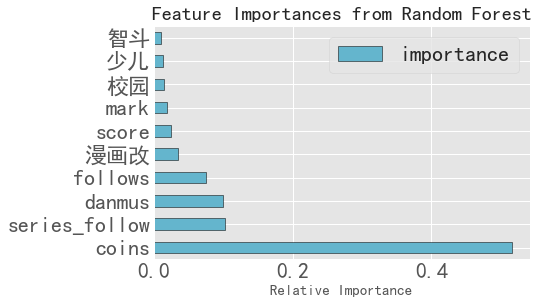

In [45]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(dpi=300)
plt.style.use('ggplot') 
#plt.style.use('seaborn-whitegrid')
figsize=(30,12) 

# 对前十个画水平柱状图
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'black',
                                 kind='barh', color = 'c');
plt.xlabel('Relative Importance', size = 15); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 20);


In [650]:
most_important_features = feature_results['feature'][:10]
f_index = [feature_list.index(x) for x in most_important_features]

X_reduced = X[:, f_index]
X_test_reduced = X_test[:, f_index]
print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (917, 10)
Most important testing  features shape:  (394, 10)


In [653]:
GB=best_model
#验证LinearRegression模型在删减前和删减后数据集上的拟合效果
GB.fit(X, y)
GB_full_pred = GB.predict(X_test)

GB.fit(X_reduced, y)
GB_reduced_pred = GB.predict(X_test_reduced)

# Display results
print('完整数据集: MAE = %0.4f.' % mae(y_test, GB_full_pred))
print('删减数据集: MAE = %0.4f.' % mae(y_test, GB_reduced_pred))

完整数据集: MAE = 1826.7525.
删减数据集: MAE = 1818.7363.
